In [1]:
!pip install pandas numpy tensorflow matplotlib joblib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from sklearn.metrics import mean_squared_error

2025-08-20 12:50:29.771739: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-20 12:50:29.836962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-20 12:50:32.304002: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
model = tf.keras.models.load_model('stock_lstm_model.h5')

2025-08-20 12:50:53.871920: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [5]:
scaler = joblib.load('scaler.pkl')

In [6]:
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [7]:
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [8]:
df = pd.read_csv('AAPL_raw.csv', skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])

In [10]:
train_size = int(len(df) * 0.8)
test_dates = df.index[train_size+60:]

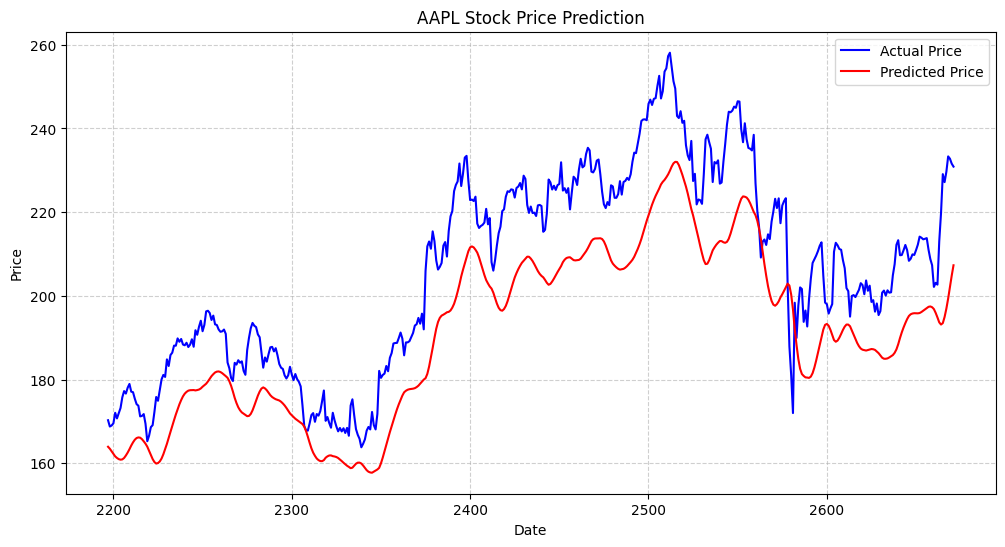

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_scaled, color='blue', label='Actual Price')
plt.plot(test_dates, predictions, color='red', label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()